# Algoritmo de ordenamiento binario - BinarySort
![Descripción de la imagen](orden-2.png)


##### He desarrollado un algoritmo de ordenamiento al que he llamado "BinarySort," inspirado en la búsqueda binaria.
##### Este algoritmo está diseñado para ordenar listas de números positivos y enteros (por ahora) con una eficiencia de 
𝑂
(
log
⁡
𝑛
)
.
##### Para las pruebas, he utilizado los siguientes parámetros
- Tamaño de la lista a ordenar: Varía de 1 a 10 millones.
- Rango de valores: La lista contiene números aleatorios en el rango de 0 a 
𝑁
N, donde 
𝑁
N puede tomar valores de [10k, 50k, 100k, 200k]
- Distribución estadística de los números en la lista: Normal, bimodal, uniforme, sesgada a la izquierda, sesgada a la derecha y con muchos ceros.



##### Se realizará una permutación entre todos los parámetros, y cada prueba se llevará a cabo utilizando los algoritmos QuickSort, MergeSort y BinarySort. Los resultados se graficarán y se presentarán las conclusiones correspondientes.

## Importamos las bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

## Cargamos la data ya ordenada

In [2]:
filename = 'data.csv'
df = pd.read_csv(filename)

### Verificamos que todas las pruebas hayan sido exitosas

In [3]:
count_true = df['ordered'].value_counts()[True]
if count_true == df.shape[0]:
    print("todos se ordenaron")
else:
    print("no se ordenaron todos")


todos se ordenaron


### Cargamos constantes necesarias y funciones

In [4]:
def format_number(x, pos):
    if x >= 1e6:
        return f'{x/1e6:.1f}M' 
    elif x >= 1e3:
        return f'{x/1e3:.0f}k'  
    else:
        return str(int(x)) 
colors = ['dodgerblue', 'green', 'orange']
color_map = {
    'binarySort': 'dodgerblue',
    'mergeSort': 'green',
    'quickSort': 'orange',
}
distributions = ['uniform', 'normal', 'bimodal', 'zeros', 'right_skewed', 'left_skewed']
def plot_distributions(df, dist):
    ranges = [10000, 50000, 100000, 200000]
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))  
    axs = axs.flatten()
    
    ax_index = 0

    for r in ranges:
        filtered_df = df[(df['range'] == r) & (df['distribution'] == dist)]
        
        ax = axs[ax_index]
        
        for method in filtered_df['method'].unique():
            subset = filtered_df[filtered_df['method'] == method]
            ax.plot(subset['size'], subset['time'], label=method, color=color_map.get(method, 'black'), linewidth=2)

        ax.set_xlabel('Tamaño de la Lista')
        ax.set_ylabel('Tiempo en segundos')
        ax.set_title(f'Rango de valores: entre 0 y {r}')
        ax.legend(title='Algoritmo')
        ax.grid(True)
        
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_number))
        plt.xticks(rotation=45)

        ax_index += 1

    plt.tight_layout()
    plt.show()


## Grafica de lineas donde expresamos el rendimiento de cada algoritmo

#### 1. Distribucion Normal
<img src="normal.jpg" alt="Descripción de la imagen" width="200"  style="border-radius: 15px;"/>



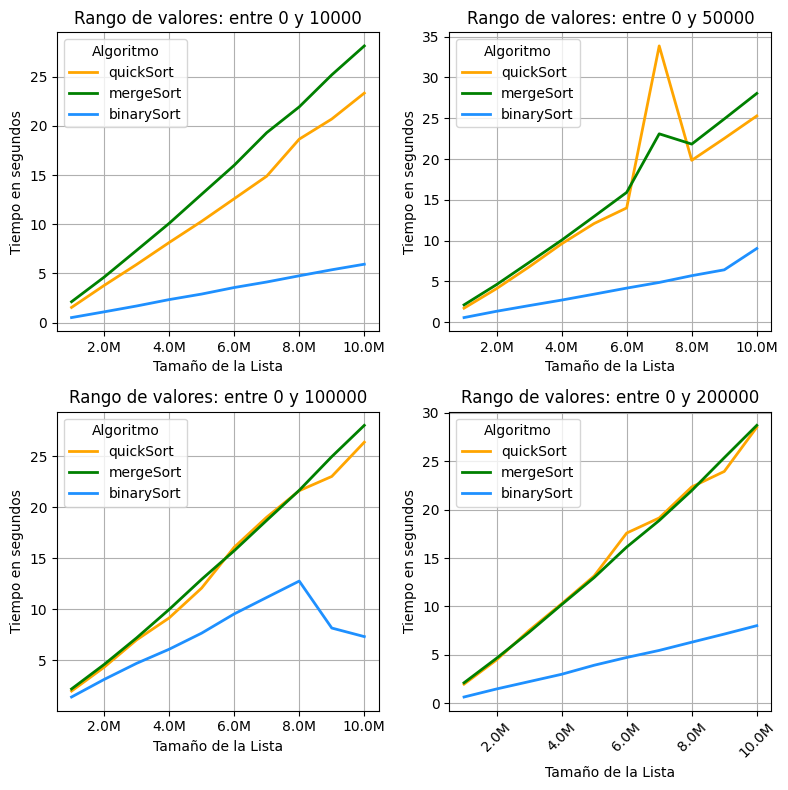

In [5]:
plot_distributions(df, 'normal')

#### 2. Distribucion Uniforme
<img src="uniforme.png" alt="Descripción de la imagen" width="200"  style="border-radius: 15px;"/>

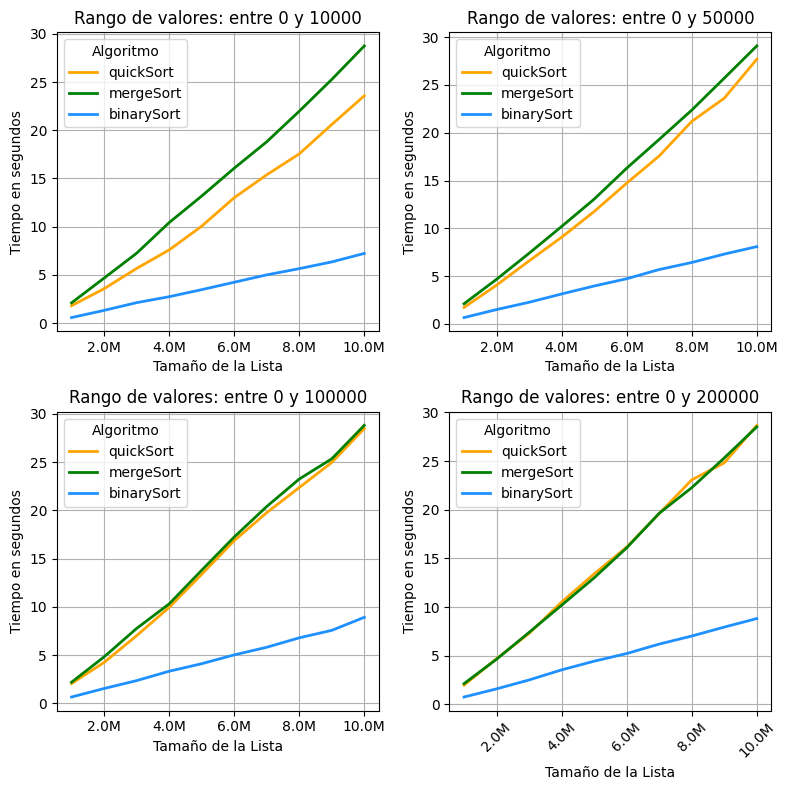

In [6]:
plot_distributions(df, 'uniform')

#### 3. Distribucion Bimodal
<img src="bimodal.PNG" alt="Descripción de la imagen" width="200"  style="border-radius: 15px;"/>

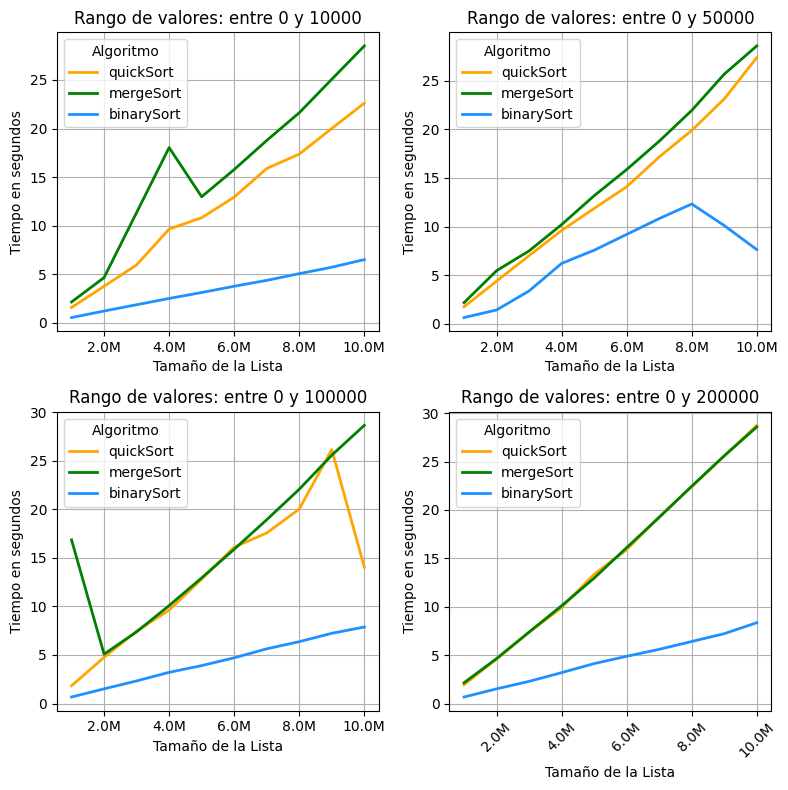

In [7]:
plot_distributions(df, 'bimodal')

#### 4. Distribucion Sesgada a la derecha
<img src="right.png" alt="Descripción de la imagen" width="200"  style="border-radius: 15px;"/>

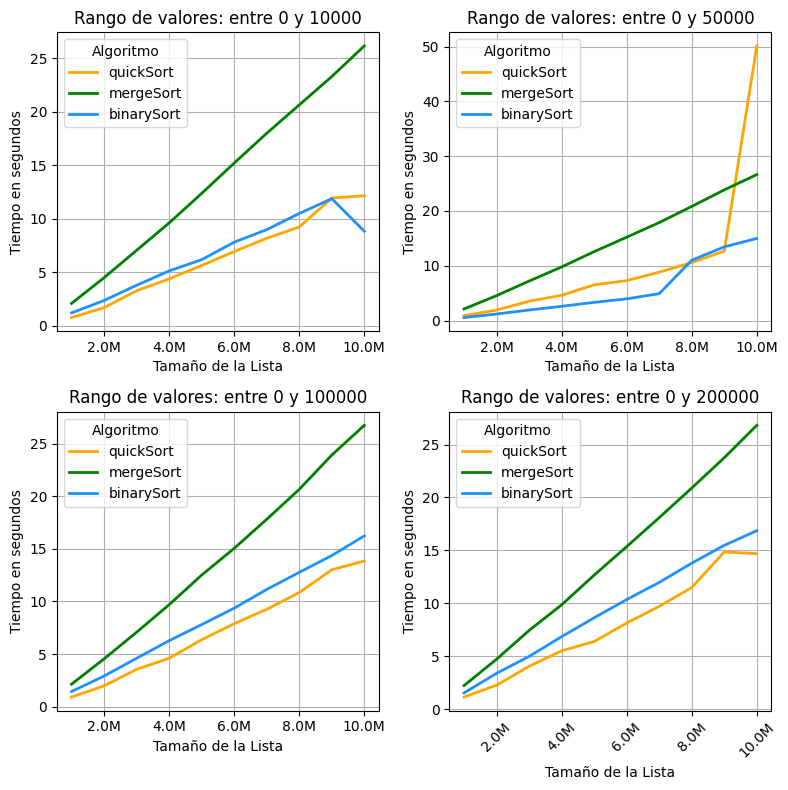

In [8]:
plot_distributions(df, 'right_skewed')

#### 5. Distribucion Sesgada a la izquierda
<img src="left.png" alt="Descripción de la imagen" width="200"  style="border-radius: 15px;"/>

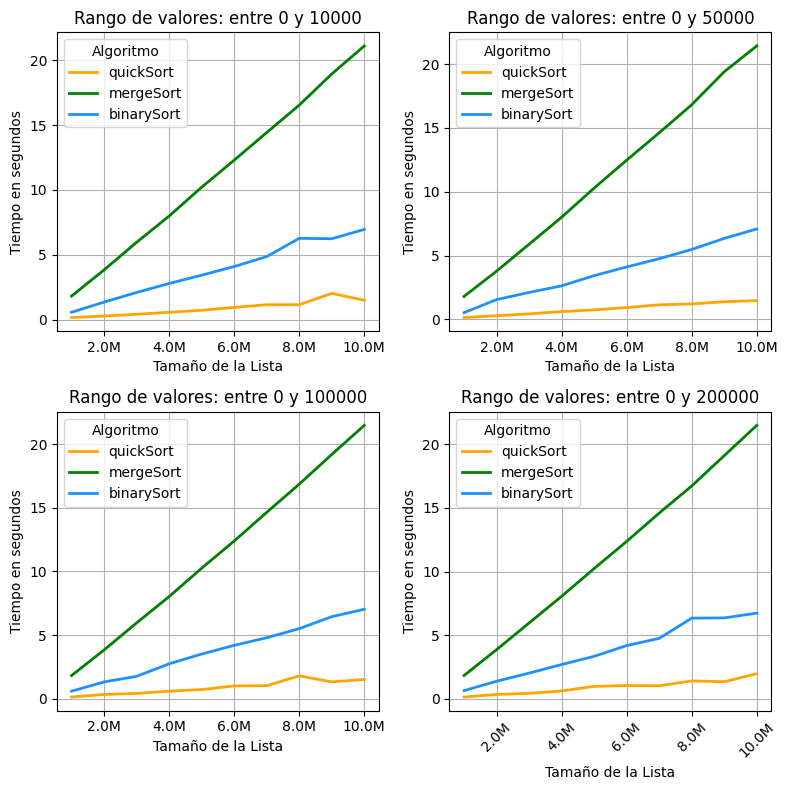

In [9]:
plot_distributions(df, 'left_skewed')

#### 6. Lista de numeros con el 70% de sus valores en 0
<img src="zeros.jpg" alt="Descripción de la imagen" width="200"  style="border-radius: 15px;"/>

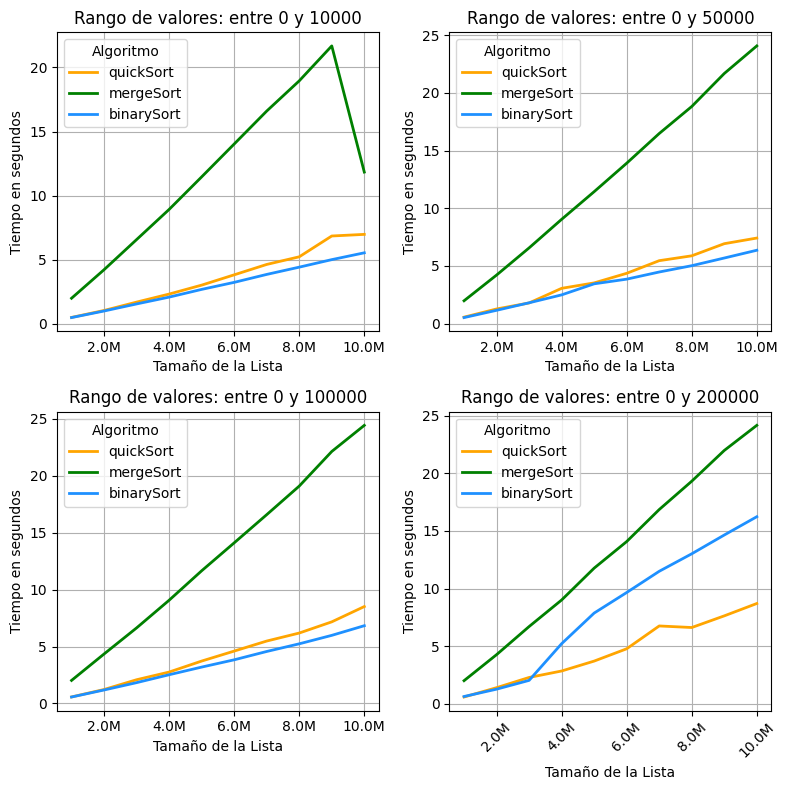

In [10]:
plot_distributions(df, 'zeros')

### Mapa de calor donde visualmente percibimos los puntos de mayor estres para los algoritmos

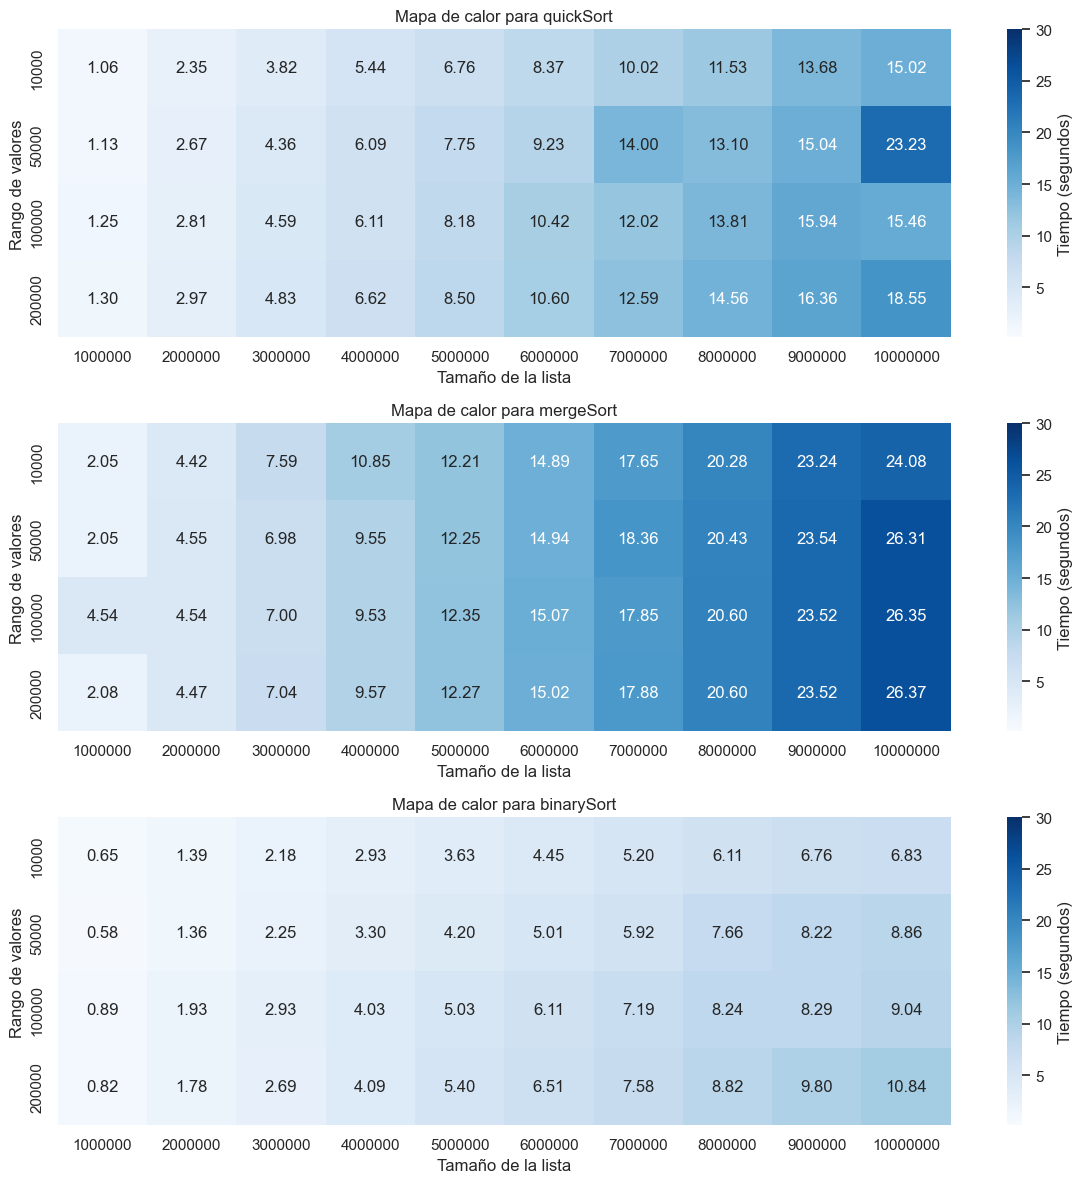

In [11]:

sns.set(style="whitegrid")


vmin = df['time'].min()
vmax = 30 #df['time'].max()

fig, axes = plt.subplots(3, 1, figsize=(12, 12))


methods = df['method'].unique()

axes = axes.flatten()

for i, method in enumerate(methods):
    df_method = df[df['method'] == method]
    
    pivot_table = df_method.pivot_table(index="range", columns="size", values="time")
    
    sns.heatmap(pivot_table, ax=axes[i], annot=True, fmt=".2f", cmap="Blues", vmin=vmin, vmax=vmax,  cbar_kws={'label': 'Tiempo (segundos)'} )
    axes[i].set_title(f"Mapa de calor para {method}")
    axes[i].set_xlabel("Tamaño de la lista")
    axes[i].set_ylabel("Rango de valores")

plt.tight_layout()
plt.show()


### Grafico de barras donde compararemos los 3 algoritmos

In [12]:
ranges = df["range"].unique()
distributions = df["distribution"].unique()
sizes = df["size"].unique()
quickSort = 0
mergeSort = 0
binarySort = 0

for ran in ranges:
    for dist in distributions:
        for si in sizes:
            temp = df[(df["range"] == ran) & (df["distribution"] == dist) & (df["size"] == si )]

            if temp.iloc[0]["time"] < temp.iloc[1]["time"] and temp.iloc[0]["time"] < temp.iloc[2]["time"]:
                method_with_min_time = temp.iloc[0]["method"]

            elif temp.iloc[1]["time"] < temp.iloc[0]["time"] and temp.iloc[1]["time"] < temp.iloc[2]["time"]:
                method_with_min_time =temp.iloc[1]["method"]

            elif temp.iloc[2]["time"] < temp.iloc[1]["time"] and temp.iloc[2]["time"] < temp.iloc[0]["time"] :
                method_with_min_time =temp.iloc[2]["method"]


            
            if method_with_min_time == 'quickSort':
                quickSort += 1
            if method_with_min_time == 'mergeSort':
                mergeSort += 1
            if method_with_min_time == 'binarySort':
                binarySort += 1


methods = [ 'binarySort', 'mergeSort', 'quickSort' ]
times = [binarySort, mergeSort, quickSort ] 

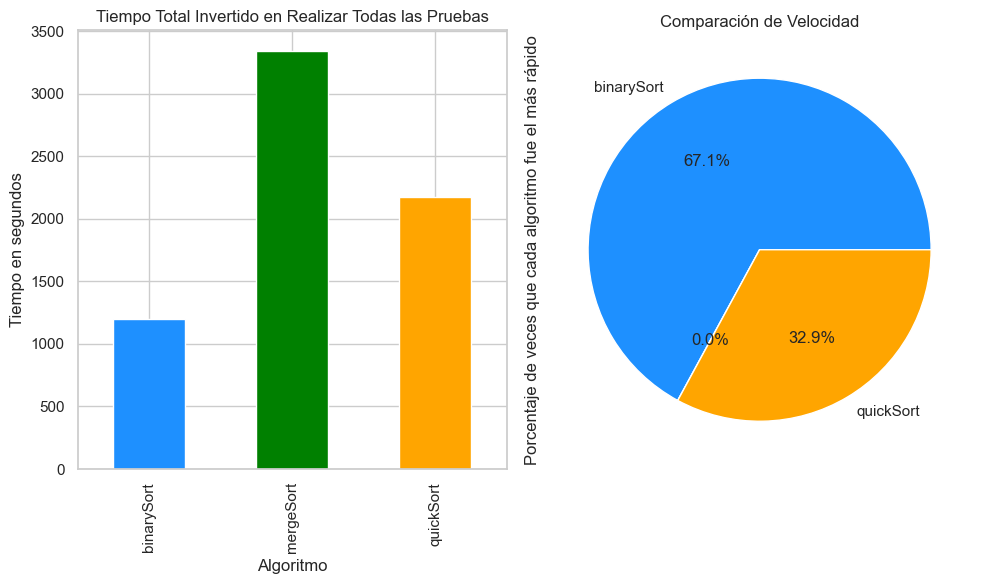

In [13]:

fastest_method_counts = pd.Series(times, index=methods)
total_time_per_method = df.groupby('method')['time'].sum()


fig, axes = plt.subplots(1, 2, figsize=(10, 6))  


total_time_per_method.plot(kind='bar', color=colors, ax=axes[0], title='Tiempo Total Invertido en Realizar Todas las Pruebas')
axes[0].set_xlabel('Algoritmo')
axes[0].set_ylabel('Tiempo en segundos')


fastest_method_counts.plot.pie( ax=axes[1],autopct='%1.1f%%', colors=colors,  title='Comparación de Velocidad')
axes[1].set_ylabel('Porcentaje de veces que cada algoritmo fue el más rápido')

plt.tight_layout()

plt.show()

### Los resultados preliminares sugieren que el algoritmo de ordenamiento binario demuestra un comportamiento eficiente en al menos el 66% de las ocasiones

### Las pruebas se realizaron en mi laptop personal con un procesador i7. En caso de necesitar pruebas más exhaustivas, planeo alquilar instancias de Amazon para manejar una mayor cantidad de datos